In [2]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from src.GWOptimalTransfer import GWOptimalTransfer
from src.CalculateDissimilarity import CalculateDissimilarity
from src.GenerateRandomBenckmark import GenerateRandomBenchmark
from sklearn.cluster import KMeans
from src.EmotionAnalysis import EmotionAnalysis
non_al_folder_path = './qualia_rawdata/non_alcohol/'
al_folder_path = './qualia_rawdata/alcohol/'
qualia_color = {
    'empatic_pain': 'orange',
    'guilt': 'black',
    'fear': 'violet',
    'anger': 'red',
    'envy': 'purple',
    'sadness': 'blue',
    'surprise': 'gray',
    'joy': 'cyan',
    'amusement': 'brown',
    'romance': 'pink',
    'aesthetic_appreciation': 'yellow',
    'awe': 'green',
}

In [3]:
def save_(target, file_path):
    #if not exist
    os.makedirs(os.path.dirname(file_path), exist_ok=True)

    with open(file_path, 'w') as file:
        for item in target:
            file.write("%s\n" % item)

all_dissimilarity_matrices:(2, 9, 12, 12)
all_original_embeddings: (2, 9, 12, 3)
(2, 12, 3)


  0%|          | 0/2 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 2/2 [00:05<00:00,  2.86s/it]


best_gw_distance: 1.6645470701013756
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['empatic_pain', 'guilt', 'fear', 'anger', 'sadness', 'surprise']
Cluster 1: ['envy', 'amusement', 'awe']
Cluster 2: ['joy', 'romance', 'aesthetic_appreciation']


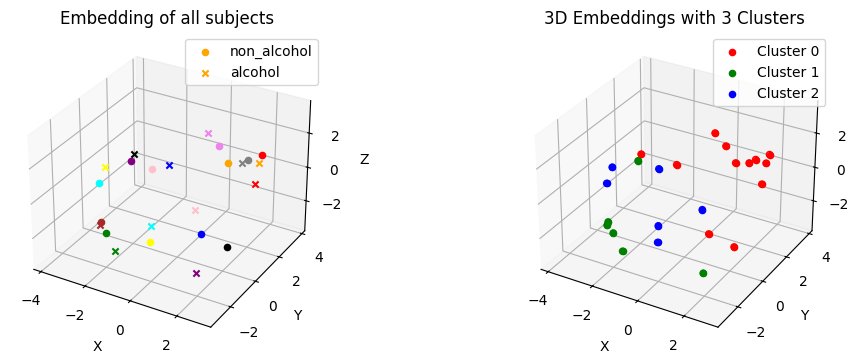

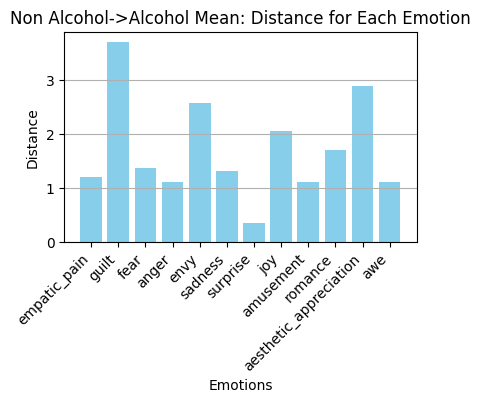

In [10]:

ea = EmotionAnalysis(qualia_color=qualia_color)
non_al_folder_path = './qualia_rawdata/non_alcohol/'
al_folder_path = './qualia_rawdata/alcohol/'
all_distances = ea.process1(
    non_al_folder_path=non_al_folder_path,
    al_folder_path=al_folder_path,
    plot_dim=3,
    iter_num=2,
    title='Embedding of all subjects',
    labels=['non_alcohol', 'alcohol']
)
save_(target=all_distances, file_path='./save_datas/all_distances.csv')

### ランダム化させたベンチマーク

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 100/100 [43:38<00:00, 26.19s/it] 


best_gw_distance: 4.239601555850944
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['empatic_pain', 'envy', 'surprise', 'joy', 'romance', 'aesthetic_appreciation']
Cluster 1: ['fear', 'sadness', 'amusement', 'awe']
Cluster 2: ['guilt', 'anger']


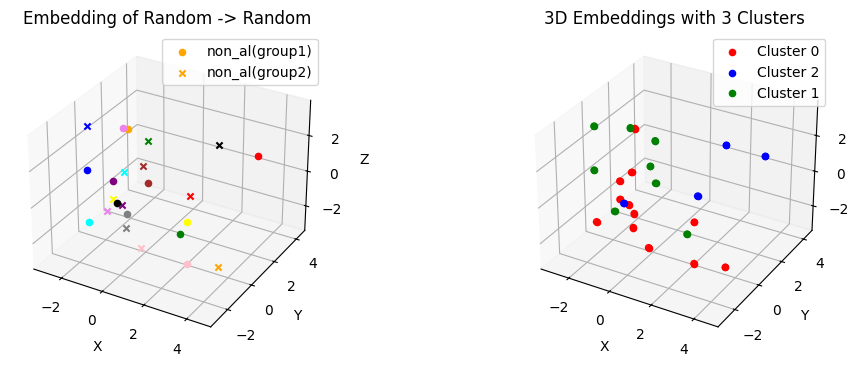

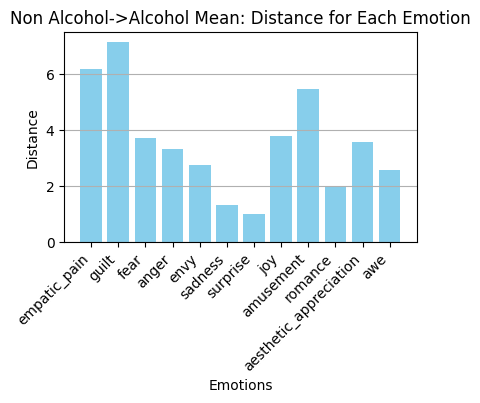

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 100/100 [38:09<00:00, 22.90s/it] 


best_gw_distance: 4.603999425182019
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['guilt', 'fear', 'surprise', 'amusement', 'romance']
Cluster 1: ['empatic_pain', 'anger', 'sadness', 'joy', 'awe']
Cluster 2: ['envy', 'aesthetic_appreciation']


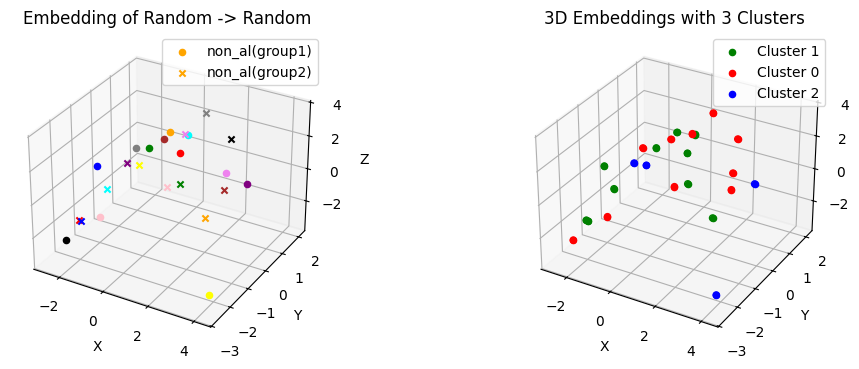

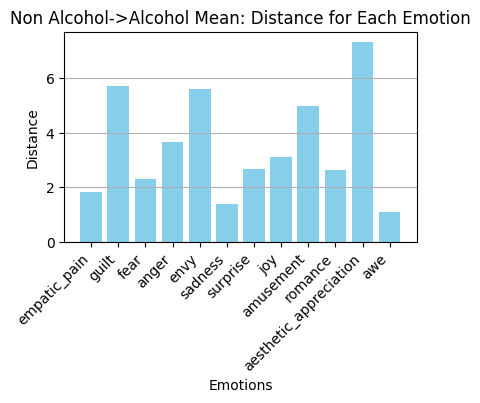

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 100/100 [1:43:10<00:00, 61.90s/it] 


best_gw_distance: 5.48010740753122
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['anger', 'envy', 'sadness', 'surprise', 'awe']
Cluster 1: ['joy', 'romance', 'aesthetic_appreciation']
Cluster 2: ['empatic_pain', 'guilt', 'fear', 'amusement']


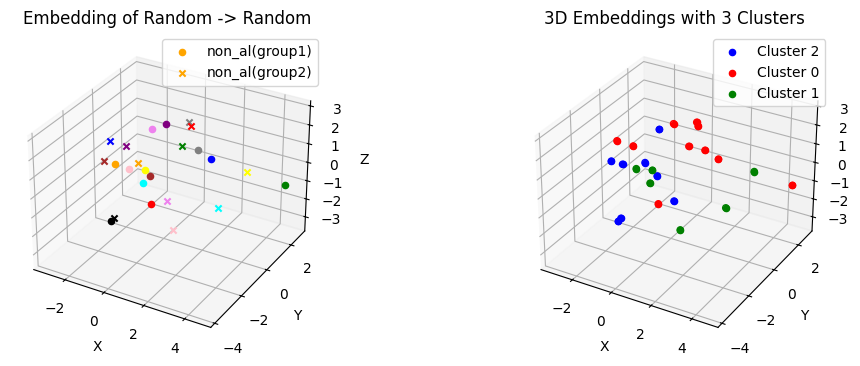

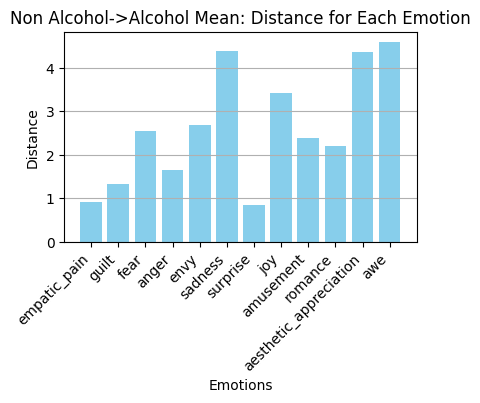

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 100/100 [30:43<00:00, 18.44s/it]


best_gw_distance: 4.861744440744961
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['empatic_pain', 'anger', 'surprise']
Cluster 1: ['fear', 'sadness', 'amusement', 'aesthetic_appreciation']
Cluster 2: ['guilt', 'envy', 'joy', 'romance', 'awe']


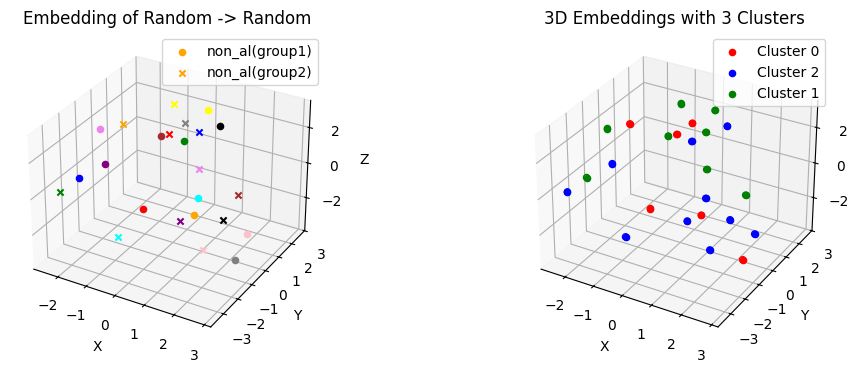

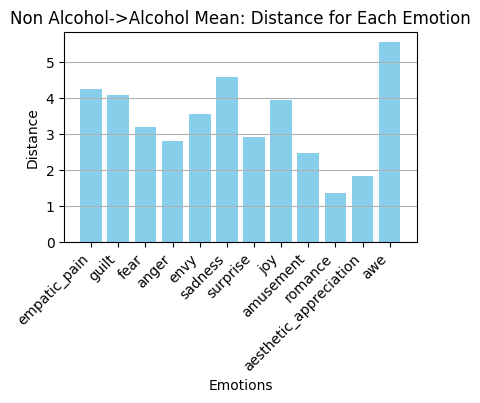

In [13]:
gen_random = GenerateRandomBenchmark(qualia_color=qualia_color)
random_distances_list = list()
for _ in range(4):
    random_distances = gen_random.random_transfer(
        iter_num=100,
        plot_dim=3,
        title='Embedding of Random -> Random'
    )
    random_distances_list.append(random_distances)
save_(target=random_distances_list, file_path='./save_datas/random_distances.csv')

In [18]:
import pandas as pd
df = pd.DataFrame(random_distances_list)
random_mean_distances = df.mean(axis=0).tolist()

## much_drunk, little_drunkの2群に分けて分析

all_dissimilarity_matrices:(2, 4, 12, 12)
all_original_embeddings: (2, 4, 12, 3)
(2, 12, 3)


  0%|          | 0/3000 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 3000/3000 [41:42<00:00,  1.20it/s]  


best_gw_distance: 1.288542980363223
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['empatic_pain', 'fear', 'anger', 'surprise']
Cluster 1: ['guilt', 'sadness', 'amusement', 'awe']
Cluster 2: ['envy', 'joy', 'romance', 'aesthetic_appreciation']


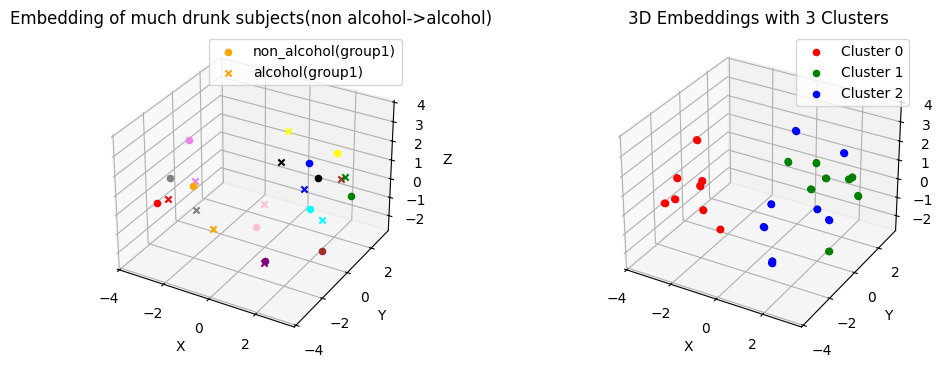

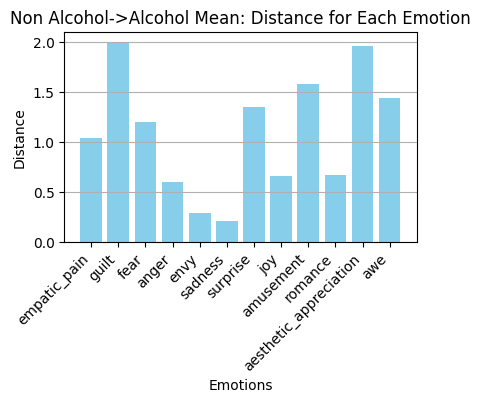

In [14]:
ea = EmotionAnalysis(qualia_color=qualia_color)
non_al_folder_path = "./qualia_rawdata/cluster_by_alcohol/much_drunk/non_alcohol/"
al_folder_path = "./qualia_rawdata/cluster_by_alcohol/much_drunk/alcohol/"
much_drunk_distances = ea.process1(
    non_al_folder_path=non_al_folder_path,
    al_folder_path=al_folder_path,
    plot_dim=3,
    iter_num=3000,
    title='Embedding of much drunk subjects(non alcohol->alcohol)',
    labels=['non_alcohol(group1)', 'alcohol(group1)']
)
save_(target=much_drunk_distances, file_path='./save_datas/much_drunk_distances.csv')

all_dissimilarity_matrices:(2, 4, 12, 12)
all_original_embeddings: (2, 4, 12, 3)
(2, 12, 3)


  0%|          | 0/3000 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 3000/3000 [35:53<00:00,  1.39it/s] 


best_gw_distance: 1.792632011397195
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['empatic_pain', 'guilt', 'fear', 'anger', 'sadness', 'surprise', 'romance']
Cluster 1: ['joy', 'amusement', 'aesthetic_appreciation', 'awe']
Cluster 2: ['envy']


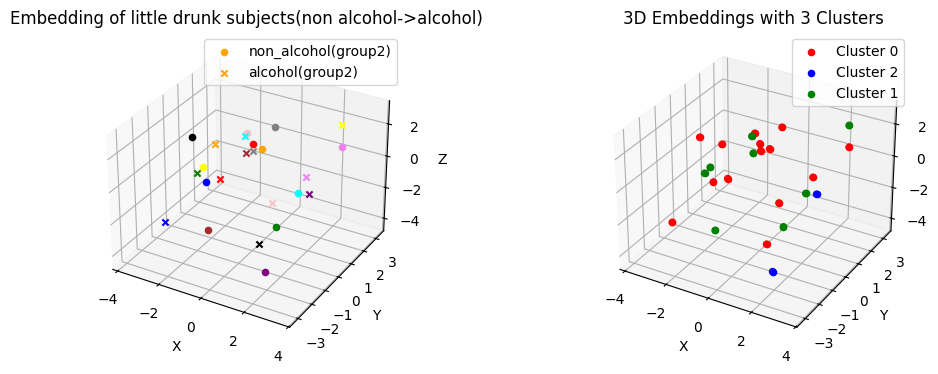

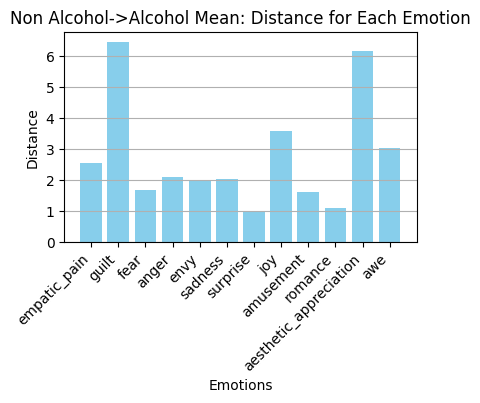

In [15]:
non_al_folder_path = "./qualia_rawdata/cluster_by_alcohol/little_drunk/non_alcohol/"
al_folder_path = "./qualia_rawdata/cluster_by_alcohol/little_drunk/alcohol/"
little_drunk_distances = ea.process1(
    non_al_folder_path=non_al_folder_path,
    al_folder_path=al_folder_path,
    plot_dim=3,
    iter_num=3000,
    title='Embedding of little drunk subjects(non alcohol->alcohol)',
    labels=['non_alcohol(group2)', 'alcohol(group2)']
)
save_(target=little_drunk_distances, file_path='./save_datas/little_drunk_distances.csv')

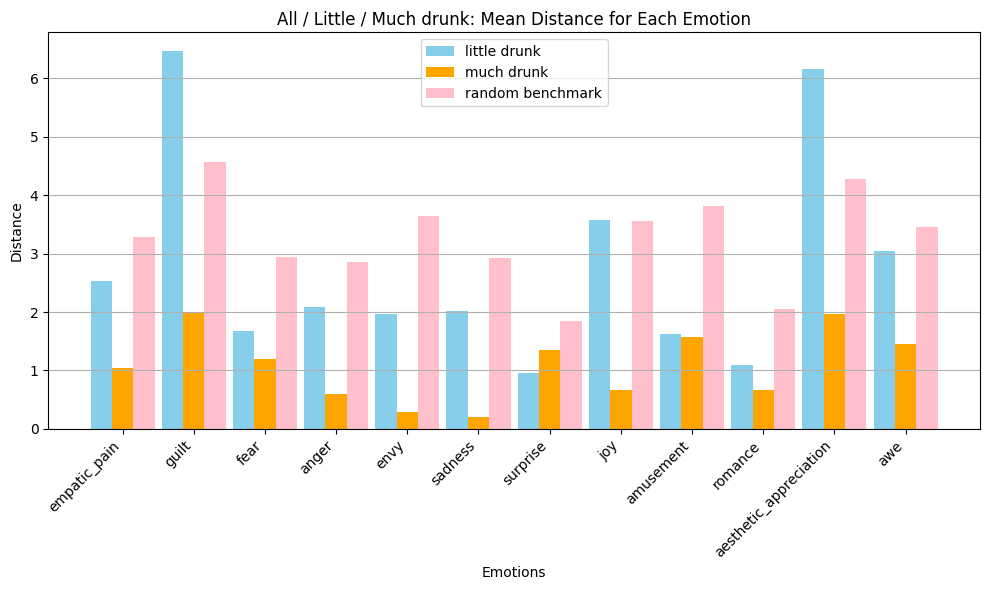

In [26]:
# バーの幅と位置の設定
emotions = list(qualia_color.keys())
bar_width = 0.3
index = np.arange(len(emotions))

# グラフの作成
fig, ax = plt.subplots(figsize=(10, 6))

# 棒グラフの描画
# bar0 = ax.bar(index, all_distances, bar_width, label='all subjects', color='pink')
bar1 = ax.bar(index , little_drunk_distances, bar_width, label='little drunk', color='skyblue')
bar2 = ax.bar(index + bar_width, much_drunk_distances, bar_width, label='much drunk', color='orange')
bar3 = ax.bar(index +2*bar_width, random_mean_distances, bar_width, label='random benchmark', color='pink')

# ラベルとタイトルの設定
ax.set_xlabel('Emotions')
ax.set_ylabel('Distance')
ax.set_title('All / Little / Much drunk: Mean Distance for Each Emotion')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(emotions, rotation=45, ha='right')
ax.legend()

# グリッドの追加
ax.grid(axis='y')

# グラフの表示
plt.tight_layout()
plt.show()

In [ ]:
print(f'all_distances:{sum(all_distances)/len(all_distances)}')
print(f'much_drunk_distances:{sum(much_drunk_distances)/len(much_drunk_distances)}')
print(f'little_drunk_distances:{sum(little_drunk_distances)/len(little_drunk_distances)}')

all_distances:0.9867396484059646
much_drunk_distances:2.281594388791814
little_drunk_distances:4.730668569428579


### 被験者間の比較
- group1非飲酒 -> gropu2非飲酒
- group1 飲酒 -> group2　飲酒
- 上記2つを比較することで、上での棒グラフと見比べて、アルコールによる認識の差異の方が大きいのか、それとも被験者間での認識の違いのほうが大きいのかを定量的に比較できるのでは？

In [8]:
# まずgroup1, group2非飲酒、非飲酒
ea = EmotionAnalysis(qualia_color=qualia_color)
non_al_folder_path = "./qualia_rawdata/cluster_by_group/non_alcohol/group1/"
al_folder_path = "./qualia_rawdata/cluster_by_group/non_alcohol/group2/"
groups_nonal_distances = ea.process1(
    non_al_folder_path=non_al_folder_path,
    al_folder_path=al_folder_path,
    plot_dim=3,
    iter_num=1000,
    title='Embedding of non alcohol(group1)->non alcohol(group2)',
    labels=['non_al(group1)', 'non_al(group2)']
)
save_(target=groups_nonal_distances, file_path='./save_datas/groups_nonal_distances.csv')

all_dissimilarity_matrices:(2, 4, 12, 12)
all_original_embeddings: (2, 4, 12, 3)
(2, 12, 3)


  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
 80%|████████  | 803/1000 [13:37<02:44,  1.20it/s] 

In [ ]:
# 次にgroup1, group2飲酒、飲酒
ea = EmotionAnalysis(qualia_color=qualia_color)
non_al_folder_path = "./qualia_rawdata/cluster_by_group/alcohol/group1/"
al_folder_path = "./qualia_rawdata/cluster_by_group/alcohol/group2/"
groups_al_distances = ea.process1(
    non_al_folder_path=non_al_folder_path,
    al_folder_path=al_folder_path,
    plot_dim=3,
    iter_num=1000,
    title='Embedding of alcohol(group1)-> alcohol(group2)',
    labels=['al(group1)', 'al(group2)']
)
save_(target=groups_al_distances, file_path='./save_datas/groups_al_distances.csv')

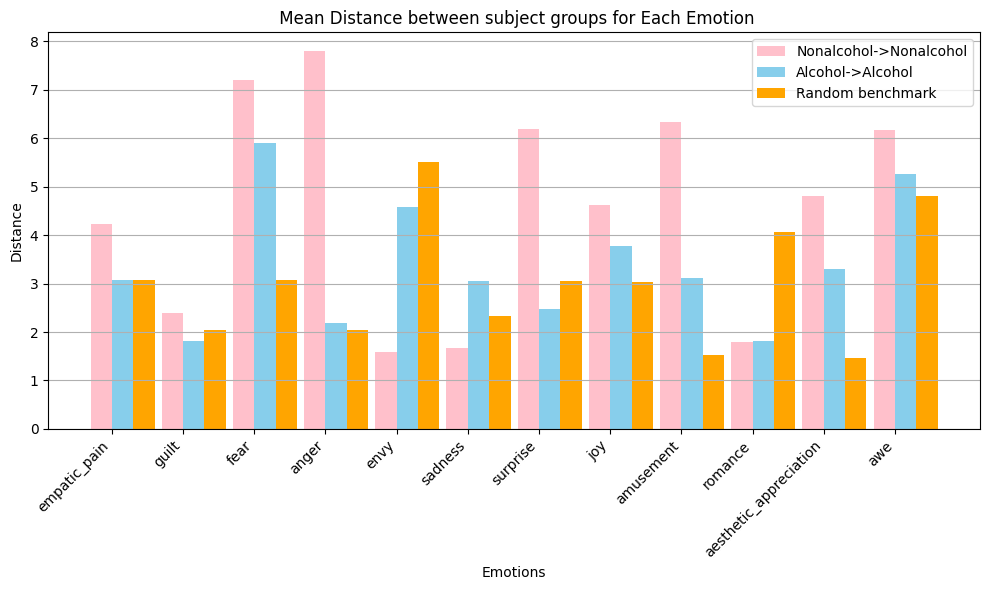

In [ ]:
# バーの幅と位置の設定
emotions = list(qualia_color.keys())
bar_width = 0.3
index = np.arange(len(emotions))

# グラフの作成
fig, ax = plt.subplots(figsize=(10, 6))

# 棒グラフの描画
bar0 = ax.bar(index, groups_nonal_distances, bar_width, label='Nonalcohol->Nonalcohol', color='pink')
bar1 = ax.bar(index + bar_width, groups_al_distances, bar_width, label='Alcohol->Alcohol', color='skyblue')
bar2 = ax.bar(index + 2*bar_width, random_mean_distances, bar_width, label='Random benchmark', color='orange')

# ラベルとタイトルの設定
ax.set_xlabel('Emotions')
ax.set_ylabel('Distance')
ax.set_title(' Mean Distance between subject groups for Each Emotion')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(emotions, rotation=45, ha='right')
ax.legend()

# グリッドの追加
ax.grid(axis='y')

# グラフの表示
plt.tight_layout()
plt.show()

all_dissimilarity_matrices:(2, 1, 12, 12)
all_original_embeddings: (2, 1, 12, 3)
(2, 12, 3)


  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\MEIP-users\Desktop\codes\qualia_analysis\venv\Lib\site-packages\ot\bregman\_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
100%|██████████| 100/100 [08:43<00:00,  5.24s/it]


best_gw_distance: 1.7364525565366866
mapped mean embeddings:(2, 12, 3)

Cluster Emotions:
Cluster 0: ['empatic_pain', 'fear', 'anger', 'envy', 'surprise', 'romance']
Cluster 1: ['joy', 'amusement', 'aesthetic_appreciation', 'awe']
Cluster 2: ['guilt', 'sadness']


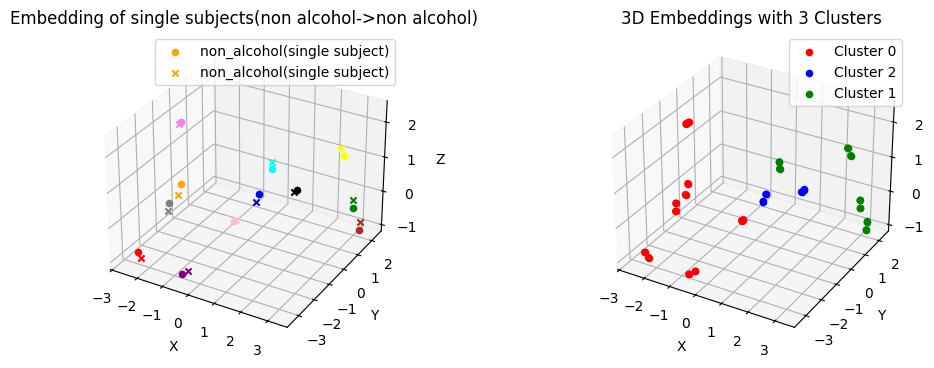

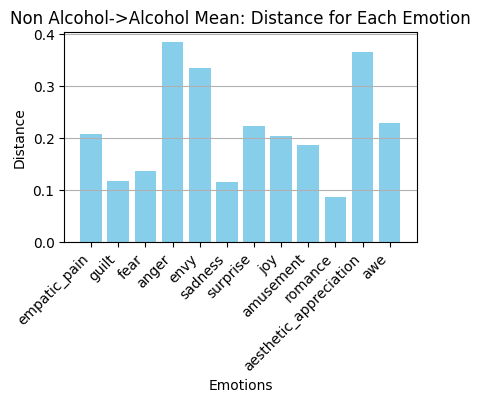

In [30]:
ea = EmotionAnalysis(qualia_color=qualia_color)
non_al_folder_path = "./qualia_rawdata/single_subject/non_alcohol/"
al_folder_path = "./qualia_rawdata/single_subject/non_alcohol/"
much_drunk_distances = ea.process1(
    non_al_folder_path=non_al_folder_path,
    al_folder_path=al_folder_path,
    plot_dim=3,
    iter_num=100,
    title='Embedding of single subjects(non alcohol->non alcohol)',
    labels=['non_alcohol(single subject)', 'non_alcohol(single subject)']
)
save_(target=much_drunk_distances, file_path='./save_datas/single_subject_test.csv')

In [ ]:
class ClusterIn3D:
    def __init__(self, all_embeddings, qualia_color):
        self.all_embeddings = np.array(list(all_embeddings.values()))
        self.qualia_color = qualia_color

        self.colors = list(self.qualia_color.values())
        self.emotions = list(self.qualia_color.keys())


    def plot_unclustered_embeddings(self, fig):
        labels = ['X'] + [f'Y{i}' for i in range(1, len(self.all_embeddings))]
        markers = ['o', 'x', 's', 'd', '^', 'v', '>', '<', '*']
        handles = []
        ax = fig.add_subplot(2,2,1, projection='3d')
        for j in range(len(self.all_embeddings)):
            for i in range(self.all_embeddings.shape[1]):
                scatter = ax.scatter(self.all_embeddings[j][i, 0], self.all_embeddings[j][i, 1], color=self.colors[i], marker=markers[j], label=labels[j])
                if i==0:
                    handles.append(scatter)
        # 凡例の作成
        # handles = [plt.Line3D([0], [0], marker=markers[j], color='w', markerfacecolor='k', markersize=10, linestyle='None', label=labels[j]) for j in range(len(self.all_embeddings))]

        # グラフの装飾
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('X_embeddings and QiYi(i=1~8) embeddings')
        ax.legend(handles, labels)
        return fig
    
    def plot_all(self, n_clusters):
        fig = plt.figure(figsize=(12,9))
        fig1 = self.plot_unclustered_embeddings(fig=fig)
        fig2, cluster_emotions = self.plot_clustered_embeddings(fig=fig1, n_clusters=n_clusters)
        plt.ion()
        plt.show()
        return fig2, cluster_emotions
    
    def plot_clustered_embeddings(self, fig, n_clusters):
        # 各感情ごとにデータを収集
        emotion_embeddings = []
        for i in range(12):
            emotion_embeddings.append(np.vstack([self.all_embeddings[j][i] for j in range(len(self.all_embeddings))]))

        emotion_embeddings = np.array(emotion_embeddings)  # (12, 9, 2)の形状に変換

        # 各感情ごとにデータをフラット化
        flattened_embeddings = emotion_embeddings.reshape(12, -1)  # (12, 10)の形状に変換

        # k-meansクラスタリングの適用
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_embeddings)

        # クラスタのラベル取得
        emotion_labels = kmeans.labels_

        # クラスタごとの色設定
        cluster_colors = ['r', 'g', 'b', 'y', 'c']
        emotion_colors = [cluster_colors[label % len(cluster_colors)] for label in emotion_labels]
        handles = dict()
        #プロット
        ax = fig.add_subplot(2,2,2, projection='3d')
        handle_cluster_flags = np.zeros(n_clusters)
        # 各感情のデータポイントをクラスタごとにプロット
        for i, embedding in enumerate(emotion_embeddings):
            for j in range(len(self.all_embeddings)):
                scatter = ax.scatter(embedding[j, 0], embedding[j, 1], embedding[j, 2], color=emotion_colors[i], label=f'Cluster {emotion_labels[i]}' if j == 0 else "")
                if handle_cluster_flags[emotion_labels[i]] == 0:
                    handles[f'Cluster {emotion_labels[i]}'] = scatter
                    handle_cluster_flags[emotion_labels[i]] = 1
                ax.scatter(embedding[j, 0], embedding[j, 1], embedding[j, 2], edgecolor=emotion_colors[i], facecolor='none')

        # クラスタの凡例の追加
        # handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i], markersize=10, linestyle='None', label=f'Cluster {i}') for i in range(n_clusters)]
        # ax.legend(handles=handles, title="Clusters")

        # グラフの装飾
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('3D Scatter Embeddings with 3 Clusters')
        ax.grid(True)
        ax.legend(list(handles.values()), list(handles.keys()))

        #感情が属しているクラス分類
        cluster_emotions = {cluster: [] for cluster in range(n_clusters)}
        for i, emotion in enumerate(self.emotions):
            cluster_emotions[emotion_labels[i]].append(emotion)
        print("\nCluster Emotions:")
        for cluster, emotions in cluster_emotions.items():
            print(f"Cluster {cluster}: {emotions}")

        return fig, cluster_emotions, 

In [ ]:
from runs.run2 import run2_preprocess, run2_calculate_dissimilarity, run2_gwot
from src.extract_paths import extract_paths
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
folder_path = './qualia_rawdata/non_alcohol/'
iter_num = 200
emotions = list(qualia_color.keys())
paths = extract_paths(folder_path=folder_path)
print(f'paths{len(paths)}')
subjects, preprocessed_dfs = run2_preprocess(paths=paths)
print(f'subjects:{len(subjects)}')
print(f'preprocessed_dfs:{np.array(preprocessed_dfs).shape}')
dissimilarity_matrices, original_embeddings = run2_calculate_dissimilarity(
    preprocessed_dfs=preprocessed_dfs,
    emotions=emotions,
    plot_dim=3
)
print(f'dissimilarity_matrices:{dissimilarity_matrices.shape}')
print(f'original_embeddings: {original_embeddings.shape}')
optimal_P, optimal_Q, all_embeddings = run2_gwot(
    subjects=subjects,
    emotions=emotions,
    dissimilarity_matrices=dissimilarity_matrices,
    original_embeddings=original_embeddings,
    distance_plot_flag=False,
    iter_num=iter_num
)
save_(target=all_embeddings, file_path='./save_datas/all_personal_mapped_nonal_embeddings.csv')

cluster3d = ClusterIn3D(
    all_embeddings=all_embeddings2,
    qualia_color=qualia_color
)

fig, cluster_emotions = cluster3d.plot_all(n_clusters=3)

In [ ]:
folder_path = './qualia_rawdata/alcohol/'
emotions = list(qualia_color.keys())
paths = extract_paths(folder_path=folder_path)
print(f'paths{len(paths)}')
subjects, preprocessed_dfs = run2_preprocess(paths=paths)
print(f'subjects:{len(subjects)}')
print(f'preprocessed_dfs:{np.array(preprocessed_dfs).shape}')
dissimilarity_matrices, original_embeddings = run2_calculate_dissimilarity(
    preprocessed_dfs=preprocessed_dfs,
    emotions=emotions,
    plot_dim=3
)
print(f'dissimilarity_matrices:{dissimilarity_matrices.shape}')
print(f'original_embeddings: {original_embeddings.shape}')
optimal_P, optimal_Q, all_embeddings = run2_gwot(
    subjects=subjects,
    emotions=emotions,
    dissimilarity_matrices=dissimilarity_matrices,
    original_embeddings=original_embeddings,
    distance_plot_flag=False,
    iter_num=iter_num
)
save_(target=all_embeddings, file_path='./save_datas/all_personal_mapped_nonal_embeddings.csv')